<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/Copy_of_FPL_API_%2B_modeller_%2B_viz_27_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FPL Player analysis code

In [ ]:
!git clone https://github.com/drew7vtedu/fpl_player_analysis

Cloning into 'fpl_player_analysis'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 28 (delta 4), reused 11 (delta 4), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [ ]:
import csv
import player_object
import fantasy_value_metrics as metrics

def save_db(players):

    csv_columns = ["first_name", "last_name", "points_last_season", "current_points", "price", "minutes", "points_per_90", "points_per_match", "points_per_match2", "value_added_per_mil"]

    outfile = open("./Data/saved_player_db.csv", 'w')
    # write headers for each column of the csv
    writer = csv.DictWriter(outfile, fieldnames = csv_columns)
    writer.writeheader()
    for player in players:
        writer.writerow(player.to_dict())



# create the initial player db and save it to a csv which can be easily loaded
def create_player_db(last_year_csv, this_year_csv):
    # open both files with the provided paths
    last_year = open(last_year_csv)
    this_year = open(this_year_csv)

    last_parser = csv.reader(last_year)
    current_parser = csv.reader(this_year)

    # skip headers
    next(last_parser)
    next(current_parser)

    # list of player objects
    player_db = []


    # first fill db with this years players
    for row in current_parser:
       player = player_object.player_obj(row[0], row[1], 0, 0, int(row[3]), 0 row[5])
       player_db.append(player)


    # check each player in last years data against current list and update matches
    for row in last_parser:
        for player in player_db:
            if player.matches(row[0], row[1]):
                player.set_pls(int(row[4]))
                player.set_minutes(int(row[5]))
                player.set_points_per_90(metrics.points_scored_per_90(int(row[4]), int(row[5])))
                player.set_points_per_match(metrics.points_scored_per_match(int(row[4]), 38))
                player.set_points_per_match2(metrics.points_scored_per_match(int(row[4]) - (2 * 38), 38))
                player.set_value_added_per_mil(metrics.value_added_per_mil(int(row[4]), 38, player.get_price()))

    last_year.close()
    this_year.close()
    save_db(player_db)

# driver code
create_player_db("./Data/cleaned_players_19-20.csv", "./Data/current_player_data.csv")


In [ ]:
import pandas as pd
import json
import csv
import requests
from pandas.io.json import json_normalize




# Define a function to get info from the FPL API and save to the specified file_path
# It might be a good idea to navigate to the link in a browser to get an idea of what the data looks like
def get_json(file_path):
    r = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)

# Run the function and choose where to save the json file
get_json('player_data.json')

# open the json file containing your data
json_data = open('player_data.json', encoding='utf-8')

# get a string (text) representation of the entire contents of the file
data = json_data.read()

# convert text to a python dictionary of key-value pairs
data_dict = json.JSONDecoder().decode(data)

# done with json input file
json_data.close()

players = data_dict["elements"]

# we will fill this list with data and convert it to csv later
csv_player_list = []
# column headers for when we convert to csv
csv_columns = ["first_name", "last_name", "current_points", "price", "minutes", "team", "Points per game"]

for player in players:
    # create dict to fill with each player's data
    temp_player_dict = {}
    # fill temp dict with desired data
    temp_player_dict["first_name"] = player["first_name"]
    temp_player_dict["last_name"] = player["second_name"]
    temp_player_dict["current_points"] = int(player["total_points"])
    temp_player_dict["price"] = int(player["now_cost"])
    temp_player_dict["minutes"] = int(player["minutes"])
    temp_player_dict["Points per game"] = (player["points_per_game"])

    # add data to list to become csv
    csv_player_list.append(temp_player_dict)

# name of the csv file to write to
csv_out = "current_player_data.csv"
try:
    with open(csv_out, 'w') as csvfile:
        # write headers for each column of the csv
        writer = csv.DictWriter(csvfile, fieldnames = csv_columns)
        writer.writeheader()
        for player in csv_player_list:
            writer.writerow(player)
except IOError:
    print("IOError while opening csv file")
# close out file
csvfile.close()

# data I can get from each player:
# 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank', 'creativity_rank_type', 'threat_rank', 'threat_rank_type', 'ict_index_rank', 'ict_index_rank_type'


#Optimiser code & Google sheets link


https://gist.github.com/calumrussell/9a869765af0698fd4fa934ca90029fc8

In [ ]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Brighton",
        4: "Burnley",
        5: "Chelsea",
        6: "Crystal Palace",
        7: "Everton",
        8: "Fulham",
        9: "Leicester City",
        10: "Leeds Utd",
        11: "Liverpool",
        12: "Manchester City",
        13: "Manchester Utd",
        14: "Newcastle utd",
        15: "Sheffield Utd",
        16: "Southampton",
        17: "Tottenham",
        18: "West Brom",
        19: "West Ham Utd",
        20: "Wolverhampton",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],  
            x["points_per_game"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()




In [ ]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
playerdata

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game
0,1,Arsenal,M,Özil,6.8,0.7,0,0,0,0.0,0,0.0
1,2,Arsenal,D,Sokratis,4.9,0.1,0,0,0,0.0,0,0.0
2,3,Arsenal,D,David Luiz,5.5,1.1,0,0,51,9.7,7,1.4
3,4,Arsenal,M,Aubameyang,11.7,15.3,1,1,73,31.4,20,3.3
4,5,Arsenal,D,Cédric,4.7,0.2,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
585,545,Wolverhampton,D,Hoever,4.5,0.0,0,0,9,3.1,2,1.0
586,546,Wolverhampton,D,Semedo,5.5,2.3,0,0,72,12.4,15,3.8
587,553,Wolverhampton,M,Shabani,4.5,0.0,0,0,0,0.0,0,0.0
588,563,Wolverhampton,D,Ait Nouri,5.0,0.0,0,0,0,0.0,0,0.0


In [ ]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
teamadjustments = pd.read_csv("/content/drive/My Drive/Data Analytics/FPL/Predicted_match_scores_GW6-10.csv")
teamadjustments
teamadjustments.columns

Index(['team', 'GW6 Predicted goals ', 'GW6 Average Predicted Goals',
       'GW6 Difference verus average', 'GW7 Predicted goals ',
       'GW7 Average Predicted Goals', 'GW7 Difference verus average',
       'GW8Predicted goals ', 'GW8 Average Predicted Goals',
       'GW8 Difference verus average', 'GW9 Predicted goals ',
       'GW9 Average Predicted Goals', 'GW9 Difference verus average',
       'GW10 Predicted goals ', 'GW10 Average Predicted Goals',
       'GW10 Difference verus average', 'Unnamed: 16', 'Average over 5 GWs'],
      dtype='object')

In [ ]:
playersteamadjusted = pd.merge(playerdata,
                 teamadjustments[['team','GW6 Difference verus average','GW7 Difference verus average','GW8 Difference verus average','GW9 Difference verus average','GW10 Difference verus average']],
                    on='team')
playersteamadjusted

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,GW6 Difference verus average,GW7 Difference verus average,GW8 Difference verus average,GW9 Difference verus average,GW10 Difference verus average
0,1,Arsenal,M,Özil,6.8,0.7,0,0,0,0.0,0,0.0,1.08,0.91,1.65,1.18,0.0
1,2,Arsenal,D,Sokratis,4.9,0.1,0,0,0,0.0,0,0.0,1.08,0.91,1.65,1.18,0.0
2,3,Arsenal,D,David Luiz,5.5,1.1,0,0,39,8.4,6,1.5,1.08,0.91,1.65,1.18,0.0
3,4,Arsenal,M,Aubameyang,11.8,16.8,1,1,61,27.9,18,3.6,1.08,0.91,1.65,1.18,0.0
4,5,Arsenal,D,Cédric,4.8,0.2,0,0,0,0.0,0,0.0,1.08,0.91,1.65,1.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,545,Wolverhampton,D,Hoever,4.5,0.0,0,0,9,3.1,2,1.0,0.85,0.98,0.67,0.93,0.0
553,546,Wolverhampton,D,Semedo,5.5,2.1,0,0,59,7.7,13,4.3,0.85,0.98,0.67,0.93,0.0
554,553,Wolverhampton,M,Shabani,4.5,0.0,0,0,0,0.0,0,0.0,0.85,0.98,0.67,0.93,0.0
555,563,Wolverhampton,D,Ait Nouri,5.0,0.0,0,0,0,0.0,0,0.0,0.85,0.98,0.67,0.93,0.0


In [ ]:
playersteamadjusted['GW6 Adjusted score'] = playersteamadjusted['points_per_game'] * playersteamadjusted['GW6 Difference verus average']
playersteamadjusted['GW7 Adjusted score'] = playersteamadjusted['points_per_game'] * playersteamadjusted['GW7 Difference verus average']
playersteamadjusted['GW8 Adjusted score'] = playersteamadjusted['points_per_game'] * playersteamadjusted['GW8 Difference verus average']
playersteamadjusted['GW9 Adjusted score'] = playersteamadjusted['points_per_game'] * playersteamadjusted['GW9 Difference verus average']
playersteamadjusted['GW10 Adjusted score'] = playersteamadjusted['points_per_game'] * playersteamadjusted['GW10 Difference verus average']
playersteamadjusted['GW6-10 Adjusted score'] = playersteamadjusted['GW6 Adjusted score'] + playersteamadjusted['GW7 Adjusted score'] + playersteamadjusted['GW8 Adjusted score'] + playersteamadjusted['GW9 Adjusted score']+ playersteamadjusted['GW10 Adjusted score']
GWprojections = playersteamadjusted

In [ ]:
GWprojections.sort_values(by=['GW6-10 Adjusted score'], ascending=False)

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,GW6 Difference verus average,GW7 Difference verus average,GW8 Difference verus average,GW9 Difference verus average,GW10 Difference verus average,GW6 Adjusted score,GW7 Adjusted score,GW8 Adjusted score,GW9 Adjusted score,GW10 Adjusted score,GW6-10 Adjusted score
445,388,Tottenham,F,Kane,10.8,35.8,5,7,228,82.8,60,12.0,1.22,1.19,1.98,0.66,0.84,14.640,14.280,23.760,7.920,10.080,70.680
311,254,Liverpool,M,Salah,12.3,47.1,6,1,179,86.3,48,9.6,1.43,1.82,0.76,1.61,1.64,13.728,17.472,7.296,15.456,15.744,69.696
447,390,Tottenham,M,Son,9.4,50.1,7,2,197,75.4,58,11.6,1.22,1.19,1.98,0.66,0.84,14.152,13.804,22.968,7.656,9.744,68.324
366,302,Manchester Utd,M,Fernandes,10.5,21.7,3,2,123,54.4,31,7.8,1.27,1.22,1.09,2.74,1.72,9.906,9.516,8.502,21.372,13.416,62.712
143,232,Chelsea,D,Chilwell,5.7,13.3,1,2,76,26.9,21,10.5,1.08,1.32,1.09,1.19,1.25,11.340,13.860,11.445,12.495,13.125,62.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,223,Leicester City,G,Ward,4.5,0.2,0,0,0,0.0,0,0.0,0.86,1.48,0.85,0.66,1.71,0.000,0.000,0.000,0.000,0.000,0.000
246,222,Leicester City,M,James,4.4,0.4,0,0,0,0.0,0,0.0,0.86,1.48,0.85,0.66,1.71,0.000,0.000,0.000,0.000,0.000,0.000
556,581,Wolverhampton,M,Otasowie,4.5,0.0,0,0,0,0.0,0,0.0,0.85,0.98,0.67,0.93,0.00,0.000,0.000,0.000,0.000,0.000,0.000
374,310,Manchester Utd,D,Bailly,4.9,0.3,0,0,11,2.5,-1,-0.5,1.27,1.22,1.09,2.74,1.72,-0.635,-0.610,-0.545,-1.370,-0.860,-4.020


In [ ]:
playerdataict=playerdata.sort_values('ict_index', ascending=False)
playerdataict.head(15)

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game
311,254,Liverpool,M,Salah,12.4,47.7,6,1,177,96.0,50,8.3
478,388,Tottenham,F,Kane,10.9,40.9,5,8,245,89.7,65,10.8
480,390,Tottenham,M,Son,9.5,55.7,8,2,227,86.1,69,11.5
308,251,Liverpool,M,Mané,12.0,9.4,4,2,124,64.5,39,7.8
367,302,Manchester Utd,M,Fernandes,10.5,22.1,3,2,137,64.0,34,6.8
43,37,Aston Villa,M,Grealish,7.3,28.0,3,3,139,63.0,39,7.8
201,508,Everton,M,Rodríguez,8.0,38.5,3,3,176,61.6,41,6.8
193,164,Everton,F,Calvert-Lewin,7.7,56.6,7,0,179,61.6,44,7.3
164,141,Crystal Palace,M,Zaha,7.3,23.8,5,1,126,60.3,48,8.0
278,202,Leeds Utd,F,Bamford,5.9,28.5,6,2,177,59.0,49,8.2


In [ ]:
topict=playerdataict.head(15)
topict

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game
311,254,Liverpool,M,Salah,12.4,47.7,6,1,177,96.0,50,8.3
478,388,Tottenham,F,Kane,10.9,40.9,5,8,245,89.7,65,10.8
480,390,Tottenham,M,Son,9.5,55.7,8,2,227,86.1,69,11.5
308,251,Liverpool,M,Mané,12.0,9.4,4,2,124,64.5,39,7.8
367,302,Manchester Utd,M,Fernandes,10.5,22.1,3,2,137,64.0,34,6.8
43,37,Aston Villa,M,Grealish,7.3,28.0,3,3,139,63.0,39,7.8
201,508,Everton,M,Rodríguez,8.0,38.5,3,3,176,61.6,41,6.8
193,164,Everton,F,Calvert-Lewin,7.7,56.6,7,0,179,61.6,44,7.3
164,141,Crystal Palace,M,Zaha,7.3,23.8,5,1,126,60.3,48,8.0
278,202,Leeds Utd,F,Bamford,5.9,28.5,6,2,177,59.0,49,8.2


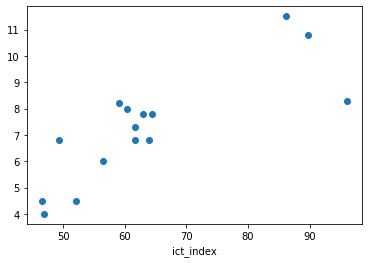

In [ ]:
ax = topict.set_index('ict_index')['points_per_game'].plot(style='o')

In [ ]:
def label_point(ict_index, points_per_game, name, ax):
    a = pd.concat({'ict_index': ict_index, 'points_per_game': points_per_game, 'name': name}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['ict_index'], point['points_per_game'], str(point['name']))

label_point(topict.ict_index, topict.points_per_game, topict.name, ax)

draw

NameError: ignored

In [ ]:
fig, ax = plt.subplots()
topict.plot('ict_index', 'points_per_game', kind='scatter', ax=ax)
for k, v in topict.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9df95e4950> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe/15911372#15911372

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string